In [18]:
!pip install pandas scikit-learn


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


                       airline Cluster_Label
0                   Aer Lingus     Orta Risk
1                    Aeroflot*     Orta Risk
2        Aerolineas Argentinas     Orta Risk
3                  Aeromexico*     Orta Risk
4                   Air Canada     Orta Risk
5                   Air France   Yüksek Risk
6                   Air India*    Düşük Risk
7             Air New Zealand*     Orta Risk
8             Alaska Airlines*     Orta Risk
9                     Alitalia     Orta Risk
10          All Nippon Airways     Orta Risk
11                   American*   Yüksek Risk
12           Austrian Airlines     Orta Risk
13                     Avianca    Düşük Risk
14            British Airways*     Orta Risk
15             Cathay Pacific*     Orta Risk
16              China Airlines    Düşük Risk
17                      Condor     Orta Risk
18                        COPA     Orta Risk
19          Delta / Northwest*    Düşük Risk
20                    Egyptair    Düşük Risk
21        

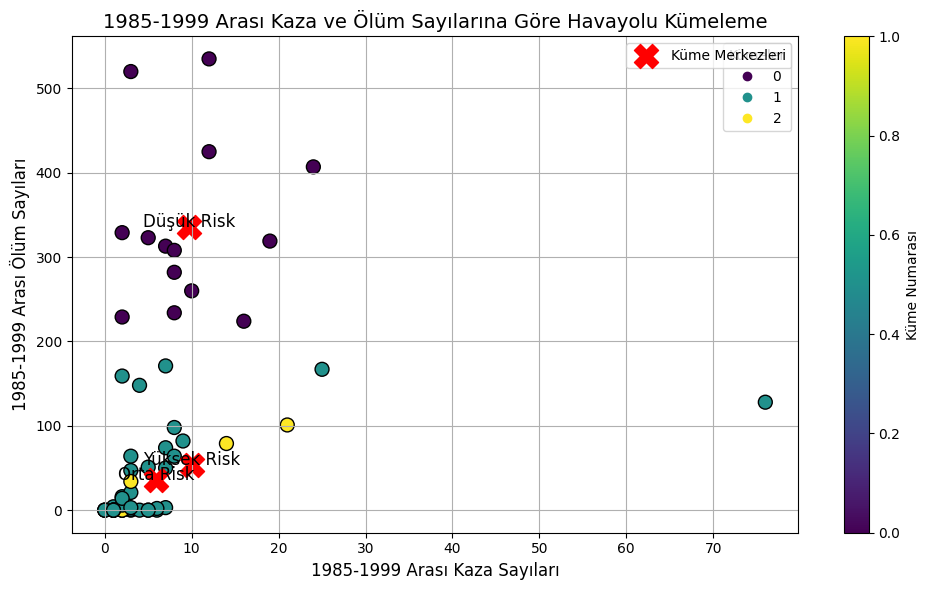

In [29]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Veri setini yükleme
url = 'airline-safety.csv'
data = pd.read_csv(url)

# İlgili sütunları seçme
features = data[['incidents_85_99', 'fatal_accidents_85_99', 'fatalities_85_99',
                 'incidents_00_14', 'fatal_accidents_00_14', 'fatalities_00_14']]

# KMeans ile kümeleme
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(features)

# Küme merkezlerini alalım
centroids = kmeans.cluster_centers_

# Küme isimleri
cluster_labels = {0: 'Düşük Risk', 1: 'Orta Risk', 2: 'Yüksek Risk'}
data['Cluster_Label'] = data['Cluster'].map(cluster_labels)

# Sonuçları görüntüleme
print(data[['airline', 'Cluster_Label']])

# Kümeleme sonuçlarını görselleştirme
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['incidents_85_99'], data['fatalities_85_99'], 
                      c=data['Cluster'], cmap='viridis', s=100, edgecolor='k')

# Küme merkezlerini çizme
plt.scatter(centroids[:, 0], centroids[:, 2], s=300, c='red', marker='X', label='Küme Merkezleri')

# Grafik düzenlemeleri
plt.title('1985-1999 Arası Kaza ve Ölüm Sayılarına Göre Havayolu Kümeleme', fontsize=14)
plt.xlabel('1985-1999 Arası Kaza Sayıları', fontsize=12)
plt.ylabel('1985-1999 Arası Ölüm Sayıları', fontsize=12)

# Renkli küme gösterimini etiketleme
legend1 = plt.legend(*scatter.legend_elements(), title="Kümeler")
plt.legend(loc='upper right')
plt.gca().add_artist(legend1)

# Küme merkezleri için etiket
plt.text(centroids[0, 0], centroids[0, 2], 'Düşük Risk', fontsize=12, ha='center', color='black')
plt.text(centroids[1, 0], centroids[1, 2], 'Orta Risk', fontsize=12, ha='center', color='black')
plt.text(centroids[2, 0], centroids[2, 2], 'Yüksek Risk', fontsize=12, ha='center', color='black')

# Diğer ayarlar
plt.colorbar(label='Küme Numarası')
plt.grid()
plt.tight_layout()
plt.show()
